# STA 141B Assignment 2

Due __Jan 29, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded for correctness.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice using data frames to index, slice, reshape, aggregate, and group data.

In [27]:
import numpy as np


In [28]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from plotnine import *

In [ ]:
pd.

## Indexing

__Exercise 1.1 (10 points).__ Give three examples of indexing a data frame with `[ ]`, `.loc[ ]`, and `.iloc[ ]`, respectively. Explain how each of these indexing methods is different.

In [5]:
data = pd.DataFrame({'x':['i','j','k'],'y':[1,2,3]})
data

,x,y
0,i,1
1,j,2
2,k,3


In [6]:
data[0:2]#get the first row and the second row

,x,y
0,i,1
1,j,2


In [7]:
data['x']#get columns by name 'x'

0    i
1    j
2    k
Name: x, dtype: object

In [8]:
data[data.y >= 2]#get rows by conditions y >= 2

,x,y
1,j,2
2,k,3


In [9]:
#Therefore, when indexing with[], Scalar values get columns by name, and conditions or slices get rows.

In [10]:
data.loc[:,'x']#get all rows and column x by name'x''.

0    i
1    j
2    k
Name: x, dtype: object

In [11]:
data.loc[data.y >= 2,:]#ger rows by condition y >= 2 and all columns.

,x,y
1,j,2
2,k,3


In [12]:
#Therefore, when indexing with .loc[], we can get things by conditions and names.

In [13]:
data.iloc[0:2,0]#Get the first rows and the second rows by positons, and get the first column by postions.

0    i
1    j
Name: x, dtype: object

In [14]:
#Therefore,when indexing with .iloc[ ],we can get things by positions.

__Exercise 1.2 (10 points).__ What do negative indexes (as in `x[-1]`) do in Python? Create and try three examples of negative indexes for lists, NumPy arrays, and data frames, respectively. Then explain what you think negative indexes do. Confirm your explanation by linking to a relevant page in the Python, NumPy, or Pandas documentation.

In [15]:
x = [1,2,3,4,5,6]
x[-1]
#In this example, x is a list. When we use x[-1], we get 6, which is the last element in the list.

6

In [16]:
y = np.array([1,2,3,4,5,6])
y[-2]
#In this example, y is a NumPy array. When we use y[-2], we get 5, which is the second last element in the NumPy array.

5

In [17]:
z = pd.DataFrame({'x':['i','j','k'],'y':[1,2,3]})
z[-1:]
#In this example, z is a data frame. When we use z[-1:], we get the last row in the data frame.

,x,y
2,k,3


In [18]:
#Therefore, in Python, negative indexes are positions of elements which start from the last element. For instance, x[-1] is the position of last element;
#x[-2] is the position of the second last element and so on.

__Exercise 1.3 (10 points).__ Give an example and explain Pandas' data alignment (or index alignment) feature.

In [19]:
x = pd.Series([1, 2, 3], index = ['i','j','k'])
y = pd.Series([100,10,1,0],index = ['m','j','i','k'])

In [20]:
x + y
#In this example, we do vectorized operations (plus) on x and y. We find that we get the sum of each elements with the same index in x and y .
#That is, with index i, we get the sum of 1 in x and 1 in y; with index j, we get the sum of 2 in x and 10 in y; with index k,we get the sum of 3 in x
#and 0 in y; with the index m, since there is no elements having index m, we get NaN.

#Therefore, for Pandas' data, elements are automatically aligned by index. And when we do vectorized operation, we are actually doing that opeartion 
#on the elements with the same index.


i     2.0
j    12.0
k     3.0
m     NaN
dtype: float64

__Exercise 1.4 (10 points).__ Explain the difference between the similarly-named data frame methods `.reindex()` and `.reset_index()`. Give two examples to show what each method respectively does.

How might these methods be useful when combined with Pandas' data alignment feature?

*Hint: Besides the Pandas documentation, `.reindex()` is explained in Python for Data Analysis 5.2, and `.reset_index()` is explained [here](https://jakevdp.github.io/PythonDataScienceHandbook/03.05-hierarchical-indexing.html#Index-setting-and-resetting).*

In [21]:
#.reindex() changes the old index of data frame into new index. And By default values in the new index that do not have corresponding records in 
#the dataframe are assigned NaN.(From https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html) So we can use
#fill_value to repalce the NaN

In [22]:
#.reset_index() turns the index labels of data frame into columns.

In [25]:
#Example of .redindex()
data = pd.DataFrame({'x':['i','j','k'],'y':[1,2,3]})
data

,x,y
0,i,1
1,j,2
2,k,3


In [26]:
eee = data.reset_index(name='population')

TypeError: reset_index() got an unexpected keyword argument 'name'

In [814]:
data_re = data.reindex(['m','n',0], fill_value = 0)
data_re
#In this example, we change the old index 0,1,2 to new index m, n, 0. And since index m, n do not have corresponding records in the dataframe, it will
#show NaN, and we fill NaN with 0. Index 0 keeps its corresponding value in the new data frame.

,x,y
m,0,0
n,0,0
0,i,1


In [815]:
#Example of .reset_index()
data = pd.DataFrame({'x':['i','j','k'],'y':[1,2,3]},index = [5,6,7])
data

,x,y
5,i,1
6,j,2
7,k,3


In [816]:
data_reset = data.reset_index()
data_reset
#In this example, we change the old index 5,6,7 to a new column, and the name of the new column is 'index'.

,index,x,y
0,5,i,1
1,6,j,2
2,7,k,3


In [817]:
#How might these methods be useful when combined with Pandas' data alignment feature?
data = pd.DataFrame({'x':['i','j','k'],'y':[1,2,3]})
data

,x,y
0,i,1
1,j,2
2,k,3


In [818]:
data_re = data.reindex([0,2])
data_re
#When combined with Pandas' data alignment feature, we may keep the rows or columns that we need and delete the rows or columns that 
#we do not need by using .reindex(). More precisely, in this example, we want to keep the rows with index 0,2 and delete the row with index 1,
#So we just need to use .reindex([0,2]) and get the data frame we need.

,x,y
0,i,1
2,k,3


## Aquaculture Data Set 🐟🦐

The U.S. Department of Agriculture publishes data sets about U.S. food production online. In the next few exercises, you'll use the [U.S. Aquaculture data set](https://www.ers.usda.gov/webdocs/DataFiles/47759/AquacultureTradeFull.xls?v=661.2). The data set contains information about fish and shellfish imports and exports (more info [here](https://www.ers.usda.gov/data-products/aquaculture-data/)). The data set is published as a single Excel file.

__Exercise 1.5 (20 points).__ Download the aquaculture data set, open it in your favorite spreadsheet program, and take a moment to familiarize yourself with the data.

Use Pandas to _read_ the sheet that contains total imports from the Excel file. Clean the data frame so that it's _tidy_ (more info [here](http://shzhangji.com/blog/2017/09/30/pandas-and-tidy-data/) and [here](https://www.jstatsoft.org/article/view/v059i10)). In particular, make sure that:

* years are in a single column
* measurements are in a single column
* all observations indicate whether they are value or volume
* fish type and preparation are in separate columns
* footnotes are removed

For example, after tidying the data, I ended up with a multiindex series that looked like:

```
measurement     product  format             year
volume_1000lbs  Trout     fresh and frozen  1989    1467.892443
                                            1990    5898.067124
                                            1991    3866.117733
                                            1992    6200.029791
                                            1993    4744.615508
                                            ...
dtype: float64
```

Your result does not have to be identical, but should have a similar shape. Your result can be a data frame with multiple columns, or a multiindex series.

Convert your code into a function `read_aqua_mx()` with appropriate documentation and parameters. Test that your function can also correctly read the total exports sheet.

In [819]:
Import = pd.read_excel('AquacultureTradeFull.xls',sheet_name='FishShellfish_M_Yearly-Full',skiprows = 1)#skip the first row since it is the name of the data set

In [820]:
Import = Import[:-3]#Remove last three rows since they are not useful.

In [821]:
Import = Import[Import['Unnamed: 1'] == Import['Unnamed: 1']]#Remove last three lines by check NaN in the type of fish
#The reason why I do this is because the export has two useless line and improt has three, so we cannot do it by line number.

In [822]:
#See the index of the value line
Value_line = Import[Import.Product == 'Value\n(1,000 U.S. dollars)'].reset_index()
Index = Value_line.iloc[0,0]

In [823]:
#Give measurements to all rows
Import.iloc[0:Index,0] = 'Volume_1,000 pounds'
Import.iloc[Index:,0] = 'Value_1,000 U.S. dollars'

In [824]:
Import = Import.rename(columns = {"Product": "measurement","Unnamed: 1":"product"}) 

In [825]:
#Split the fish type and preparation into product and format, and remove the 1/,2/,3/,4/,5/.
new = Import['product'].str.split(",", n = 1, expand = True) 
new[1] = new[1].str.strip(' [1,2,3,4,5]/')
new[0] = new[0].str.strip(' [1,2,3,4,5]/')
Import['product'] = new[0]
Import['format'] = new[1]

In [826]:
#move format in front of years and remove Jan-Oct17,18.
Import = Import[['measurement','product','format','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
        '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]

In [827]:
Import = Import.set_index(['measurement','product','format'])

In [828]:
Import = Import.replace(np.NaN,0)#Replace NaN with 0

In [829]:
stacked = Import.stack()

In [830]:
#give 1989,1990,etc. the name 'year'.
stacked.index.set_names('year', level=len(stacked.index.names)-1, inplace=True)

In [831]:
Import = stacked

In [832]:
Import

measurement               product          format            year
Volume_1,000 pounds       Trout            fresh and frozen  1989     1467.892443
                                                             1990     5898.067124
                                                             1991     3866.117733
                                                             1992     6200.029791
                                                             1993     4744.615508
                                                             1994     3880.765242
                                                             1995     4077.122105
                                                             1996     4549.389616
                                                             1997     5401.612705
                                                             1998     5669.103902
                                                             1999     5340.006748
                                

In [833]:
#Transform the above codes into a function
def read_aqua_mx(file,sheet):
    #Read the file, remove some useless rows and rename some columns.
    data = pd.read_excel(file,sheet_name=sheet,skiprows = 1)
    data = data[data['Unnamed: 1'] == data['Unnamed: 1']]
    
    #See the index of the value line
    Value_line = data[data.Product == 'Value\n(1,000 U.S. dollars)'].reset_index()
    Index = Value_line.iloc[0,0]
    
    #Give measurements to all rows
    data.iloc[0:Index,0] = 'Volume_1,000 pounds'
    data.iloc[Index:,0] = 'Value_1,000 U.S. dollars'
    data = data.rename(columns = {"Product": "measurement","Unnamed: 1":"product"})
    
    
    #Split the fish type and preparation into product and format,and reomve 1/,2/,3/,4/,5/.
    new = data['product'].str.split(",", n = 1, expand = True) 
    new[1] = new[1].str.strip(' [1,2,3,4,5]/')
    new[0] = new[0].str.strip(' [1,2,3,4,5]/')
    data['product'] = new[0]
    data['format'] = new[1]
    
    #move format in front of years.
    data = data[['measurement','product','format','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001',
        '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017']]
    
    #give 1989,1990,etc. the name 'year' and stack data
    data = data.set_index(['measurement','product','format'])
    data = data.replace(np.NaN,0)#Replace NaN with 0
    stacked = data.stack()
    stacked.index.set_names('year', level=len(stacked.index.names)-1, inplace=True)
    data = stacked
    return data
    

In [834]:
#Read the Import data
Import = read_aqua_mx('AquacultureTradeFull.xls','FishShellfish_M_Yearly-Full')
Import

measurement               product          format            year
Volume_1,000 pounds       Trout            fresh and frozen  1989     1467.892443
                                                             1990     5898.067124
                                                             1991     3866.117733
                                                             1992     6200.029791
                                                             1993     4744.615508
                                                             1994     3880.765242
                                                             1995     4077.122105
                                                             1996     4549.389616
                                                             1997     5401.612705
                                                             1998     5669.103902
                                                             1999     5340.006748
                                

In [835]:
#Read the Export data
Export = read_aqua_mx('AquacultureTradeFull.xls','FishShellfish_X_Yearly-Full')
Export

measurement               product          format            year
Volume_1,000 pounds       Trout            fresh and frozen  1989      806.814490
                                                             1990     1855.083591
                                                             1991     1628.887169
                                                             1992     1635.767795
                                                             1993     1843.257999
                                                             1994     1963.659020
                                                             1995     1538.455780
                                                             1996     1869.545911
                                                             1997     1706.840399
                                                             1998     1451.617924
                                                             1999     1699.961978
                                

__Exercise 1.6 (20 points).__ What kind of fish or shellfish did the U.S. import the most of in 2017, and how much was imported? What was the total value of the most imported fish or shellfish, and was its value highest across all imports in 2017?

Was the most imported fish or shellfish different in previous years?

In [836]:
pd.

,measurement,product,format,year,0
0,"Volume_1,000 pounds",Trout,fresh and frozen,1989,1467.892443
1,"Volume_1,000 pounds",Trout,fresh and frozen,1990,5898.067124
2,"Volume_1,000 pounds",Trout,fresh and frozen,1991,3866.117733
3,"Volume_1,000 pounds",Trout,fresh and frozen,1992,6200.029791
4,"Volume_1,000 pounds",Trout,fresh and frozen,1993,4744.615508
5,"Volume_1,000 pounds",Trout,fresh and frozen,1994,3880.765242
6,"Volume_1,000 pounds",Trout,fresh and frozen,1995,4077.122105
7,"Volume_1,000 pounds",Trout,fresh and frozen,1996,4549.389616
8,"Volume_1,000 pounds",Trout,fresh and frozen,1997,5401.612705
9,"Volume_1,000 pounds",Trout,fresh and frozen,1998,5669.103902


In [837]:
Import_volume = Import[Import.measurement == 'Volume_1,000 pounds']
Import_volume_2017 = Import_volume[Import_volume.year == '2017']

In [838]:
Import_volume_2017 = Import_volume_2017.rename(columns = {0: "Volume"}) 
Import_volume_2017.sort_values(by='Volume',ascending=False)
#The U.S. imported the most of the frozen shrimp in 2017, the total volume is 1,139,623,000 pounds

,measurement,product,format,year,Volume
260,"Volume_1,000 pounds",Shrimp,frozen,2017,1.139623e+06
231,"Volume_1,000 pounds",Tilapia,NaN,2017,4.028994e+05
173,"Volume_1,000 pounds",Atlantic salmon,fillets,2017,3.908210e+05
289,"Volume_1,000 pounds",Shrimp,fresh and prepared,2017,3.257862e+05
57,"Volume_1,000 pounds",Atlantic salmon,fresh,2017,2.624342e+05
144,"Volume_1,000 pounds",Pacific salmon,frozen,2017,9.667602e+04
347,"Volume_1,000 pounds",Mussels,NaN,2017,7.810663e+04
376,"Volume_1,000 pounds",Clams,NaN,2017,5.185921e+04
405,"Volume_1,000 pounds",Scallops,NaN,2017,4.007691e+04
202,"Volume_1,000 pounds",Salmon,canned and prepared,2017,3.359113e+04


In [839]:
Import_value = Import[Import.measurement == 'Value_1,000 U.S. dollars']
Import_value_2017 = Import_value[Import_value.year == '2017']

In [840]:
Import_value_2017 = Import_value_2017.rename(columns = {0: "Value"}) 
Import_value_2017.sort_values(by='Value',ascending=False)
#The total value of the frozen shrimp in 2017 is 5,063,378,614 U.S. dollars.
#Its value was highest across all imports in 2017

,measurement,product,format,year,Value
550,"Value_1,000 U.S. dollars",Shrimp,frozen,2017,5063378.614
463,"Value_1,000 U.S. dollars",Atlantic salmon,fillets,2017,2159788.061
579,"Value_1,000 U.S. dollars",Shrimp,fresh and prepared,2017,1480518.830
666,"Value_1,000 U.S. dollars",Atlantic salmon,fresh,2017,948842.764
521,"Value_1,000 U.S. dollars",Tilapia,NaN,2017,674463.087
434,"Value_1,000 U.S. dollars",Pacific salmon,frozen,2017,302340.719
811,"Value_1,000 U.S. dollars",Scallops,NaN,2017,264467.192
492,"Value_1,000 U.S. dollars",Salmon,canned and prepared,2017,195396.040
637,"Value_1,000 U.S. dollars",Trout,fresh and frozen,2017,135236.725
753,"Value_1,000 U.S. dollars",Mussels,NaN,2017,121845.170


In [841]:
Import_volume_sort = Import_volume.sort_values(by=['year',0],ascending = False)#sort by year first and then sort by the actual volume.
Import_volume_sort[0::14]# from Import_volume_sort[0] to end increment 14,then we get the rows with maximun volume for each year
#Therefore, we can see that the most imported fish or shellfish are the same for previous years; they are all frozen shrimp.

,measurement,product,format,year,0
260,"Volume_1,000 pounds",Shrimp,frozen,2017,1.139623e+06
259,"Volume_1,000 pounds",Shrimp,frozen,2016,1.039918e+06
258,"Volume_1,000 pounds",Shrimp,frozen,2015,9.969346e+05
257,"Volume_1,000 pounds",Shrimp,frozen,2014,9.899661e+05
256,"Volume_1,000 pounds",Shrimp,frozen,2013,8.651424e+05
255,"Volume_1,000 pounds",Shrimp,frozen,2012,9.228771e+05
254,"Volume_1,000 pounds",Shrimp,frozen,2011,9.484600e+05
253,"Volume_1,000 pounds",Shrimp,frozen,2010,9.149248e+05
252,"Volume_1,000 pounds",Shrimp,frozen,2009,8.960445e+05
251,"Volume_1,000 pounds",Shrimp,frozen,2008,9.439889e+05


__Exercise 1.7 (20 points).__ Repeat the analysis from Exercise 1.6 for exports.

Are there any fish or shellfish that the U.S. imports and also exports?

In [842]:
Export = Export.reset_index()

In [843]:
Export_volume = Export[Export.measurement == 'Volume_1,000 pounds']
Export_volume_2017 = Export_volume[Export_volume.year == '2017']

In [844]:
Export_volume_2017 = Export_volume_2017.rename(columns = {0: "Volume"}) 
Export_volume_2017.sort_values(by='Volume',ascending=False)
##The U.S. exported the most of the frozen Pacific salmon in 2017, the total volume is 427,476,565.153 pounds

,measurement,product,format,year,Volume
144,"Volume_1,000 pounds",Pacific salmon,frozen,2017,427476.565153
173,"Volume_1,000 pounds",Salmon,canned and prepared,2017,64451.436328
86,"Volume_1,000 pounds",Pacific salmon,fresh,2017,26168.424420
318,"Volume_1,000 pounds",Clams,NaN,2017,16612.404381
347,"Volume_1,000 pounds",Scallops,NaN,2017,16436.779783
57,"Volume_1,000 pounds",Atlantic salmon,fresh,2017,12654.894043
231,"Volume_1,000 pounds",Shrimp,fresh and prepared,2017,9535.060698
202,"Volume_1,000 pounds",Shrimp,frozen,2017,8019.592512
260,"Volume_1,000 pounds",Oysters,NaN,2017,7538.579266
28,"Volume_1,000 pounds",Trout,fresh and frozen,2017,3835.533012


In [845]:
Export_value = Export[Export.measurement == 'Value_1,000 U.S. dollars']
Export_value_2017 = Export_value[Export_value.year == '2017']

In [846]:
Export_value_2017 = Export_value_2017.rename(columns = {0: "Value"}) 
Export_value_2017.sort_values(by='Value',ascending=False)
#The total value of the frozen Pacific salmon in 2017 is 767,735,935 U.S. dollars.
#Its value was highest across all exports in 2017

,measurement,product,format,year,Value
492,"Value_1,000 U.S. dollars",Pacific salmon,frozen,2017,767735.935
521,"Value_1,000 U.S. dollars",Salmon,canned and prepared,2017,170068.613
695,"Value_1,000 U.S. dollars",Scallops,NaN,2017,138529.477
666,"Value_1,000 U.S. dollars",Clams,NaN,2017,115959.927
434,"Value_1,000 U.S. dollars",Pacific salmon,fresh,2017,109910.545
579,"Value_1,000 U.S. dollars",Shrimp,fresh and prepared,2017,57345.690
405,"Value_1,000 U.S. dollars",Atlantic salmon,fresh,2017,43151.648
550,"Value_1,000 U.S. dollars",Shrimp,frozen,2017,38959.833
608,"Value_1,000 U.S. dollars",Oysters,NaN,2017,23765.096
753,"Value_1,000 U.S. dollars",Ornamental fish,NaN,2017,10370.297


In [847]:
Export_volume_sort = Export_volume.sort_values(by=['year',0],ascending = False)#sort by year first and then sort by the actual volume.
Export_volume_sort[0::12]# from Export_volume_sort[0] to end increment 12,then we get the rows with maximun volume for each year
#Therefore, we can see that the most exported fish or shellfish are the same for previous years; they are all frozen Pacific salmon.

,measurement,product,format,year,0
144,"Volume_1,000 pounds",Pacific salmon,frozen,2017,427476.565153
143,"Volume_1,000 pounds",Pacific salmon,frozen,2016,272350.630930
142,"Volume_1,000 pounds",Pacific salmon,frozen,2015,413074.640453
141,"Volume_1,000 pounds",Pacific salmon,frozen,2014,310551.492008
140,"Volume_1,000 pounds",Pacific salmon,frozen,2013,359833.980368
139,"Volume_1,000 pounds",Pacific salmon,frozen,2012,222933.210886
138,"Volume_1,000 pounds",Pacific salmon,frozen,2011,337057.719635
137,"Volume_1,000 pounds",Pacific salmon,frozen,2010,316240.437508
136,"Volume_1,000 pounds",Pacific salmon,frozen,2009,263564.495758
135,"Volume_1,000 pounds",Pacific salmon,frozen,2008,277330.845573


In [848]:
#Are there any fish or shellfish that the U.S. imports and also exports?

In [849]:
#Since the value records more types of fish import or export than the volume does, we can use value part here.
#Since the export type are the same for each year, we can use 2017 to represent that.
export_product = Export_value_2017['product'].replace(np.NaN,'unknown')
export_format = Export_value_2017['format'].replace(np.NaN,'unknown')
export_format + ' ' + export_product

376        fresh and frozen Trout
405         fresh Atlantic salmon
434          fresh Pacific salmon
463        frozen Atlantic salmon
492         frozen Pacific salmon
521    canned and prepared Salmon
550                 frozen Shrimp
579     fresh and prepared Shrimp
608               unknown Oysters
637               unknown Mussels
666                 unknown Clams
695              unknown Scallops
724                    live Trout
753       unknown Ornamental fish
dtype: object

In [850]:
#Since the import type are the same for each year, we can use 2017 to represent that.
import_product = Import_value_2017['product'].replace(np.NaN,'unknown')
import_format = Import_value_2017['format'].replace(np.NaN,'unknown')
import_format + ' ' + import_product

434         frozen Pacific salmon
463       fillets Atlantic salmon
492    canned and prepared Salmon
521               unknown Tilapia
550                 frozen Shrimp
579     fresh and prepared Shrimp
608       unknown Ornamental fish
637        fresh and frozen Trout
666         fresh Atlantic salmon
695          fresh Pacific salmon
724               unknown Oysters
753               unknown Mussels
782                 unknown Clams
811              unknown Scallops
840                    live Trout
869        frozen Atlantic salmon
dtype: object

In [851]:
#Therefore, there are some fish or shellfish that the U.S. imports and also exports.
#They are fresh and frozen Trout,fresh Atlantic salmon,fresh Pacific salmon and etc.

__Exercise 1.8 (20 points).__ What are the top five countries the U.S. imported shrimp from in 2017? _You'll need to read another sheet from the data set for this question._

Use a chart to show how volume imported has changed over the years for all countries that have ever been a top five source of shrimp.

In [856]:
shrimp = pd.read_excel('AquacultureTradeFull.xls',sheet_name='Shrimp_Q_Yearly-Full',skiprows = 1)
shrimp

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,"Product, country code, and name 1/",NaN,NaN,1989.000000,1990.000000,1991.000000,1992.000000,1993.000000,1994.000000,1995.000000,...,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,Jan-Oct 17,Jan-Oct 18
1,Total,5490.0,Thailand,48587.027122,55903.067434,100290.044933,118873.588616,147383.023977,178230.048704,171596.479997,...,448177.820228,409581.095019,299662.597191,185293.474608,143834.248353,161828.847110,181214.963591,165282.568252,133577,86533.7
2,NaN,3310.0,Ecuador,81140.160313,84397.110123,107660.243989,120593.017407,108393.818732,106056.862091,114106.073700,...,143355.642553,162681.017289,178934.030805,164341.340163,203719.054921,188933.373873,161404.221481,158315.420395,134391,143957
3,NaN,5330.0,India,28680.591189,31336.728593,38613.665525,39015.210966,42147.165323,49810.155817,39076.250336,...,66585.880800,106317.161811,145529.798882,200584.355810,239900.416108,296783.246219,339400.880081,471734.570061,385451,449026
4,NaN,5600.0,Indonesia,13493.261083,18962.218377,25458.664004,30245.894855,29391.949956,24263.628808,11775.801020,...,134690.411056,155060.939762,163311.539181,178893.650949,227753.566182,252243.805881,258158.495855,260272.340339,212026,240918
5,NaN,5700.0,China (Mainland),102989.075463,126638.650905,77414.115443,108974.427981,68343.076970,50493.604069,32314.209486,...,106030.836529,94737.819066,78575.953442,71569.785980,71775.025265,63008.158489,76742.232638,101188.675316,83946,88007.1
6,NaN,5520.0,Vietnam,NaN,NaN,NaN,NaN,NaN,1229.209042,2876.992027,...,106622.094103,100144.288554,90724.752254,131891.070226,162489.351862,133274.618240,140297.267456,123659.018291,102070,104600
7,NaN,2010.0,Mexico,60387.552978,37029.413132,36756.086301,30125.537927,44953.887228,50576.217870,72975.823344,...,51888.585254,68063.191389,57556.871241,40673.514407,44877.973274,61698.097140,55802.111179,62761.659704,39869.8,33788.2
8,NaN,5570.0,Malaysia,7976.331214,7521.952006,7770.646596,7280.823680,4342.249947,3633.807895,2699.914583,...,53674.218843,64522.480272,50620.528567,22692.313137,39004.811764,18250.548758,575.924428,561.499586,461.103,380.632
9,NaN,5380.0,Bangladesh,12905.211234,14733.405050,10775.663227,18395.343922,21062.495617,19020.016952,10916.498889,...,17849.812413,9858.615432,5949.417180,7867.409660,3290.629820,4686.261368,9043.251418,2852.238531,2310.99,2578.76


In [857]:
shrimp[shrimp['Unnamed: 0'] == 'Frozen'].index.values.astype(int)#Since we only consider the total volume for each
#country here, we can subset the data of total part. Here, we check the index of when other parts begin.

array([136])

In [858]:
shrimp_total = shrimp[0:135]
shrimp_total
#When subseting the data, we only consider the total volume for each country for each year.
#That is, we do not need to know each year's total volume in total, so we delete last line

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33
0,"Product, country code, and name 1/",NaN,NaN,1989.000000,1990.000000,1991.000000,1992.000000,1993.000000,1994.000000,1995.000000,...,2010.000000,2011.000000,2012.000000,2013.000000,2014.000000,2015.000000,2016.000000,2017.000000,Jan-Oct 17,Jan-Oct 18
1,Total,5490.0,Thailand,48587.027122,55903.067434,100290.044933,118873.588616,147383.023977,178230.048704,171596.479997,...,448177.820228,409581.095019,299662.597191,185293.474608,143834.248353,161828.847110,181214.963591,165282.568252,133577,86533.7
2,NaN,3310.0,Ecuador,81140.160313,84397.110123,107660.243989,120593.017407,108393.818732,106056.862091,114106.073700,...,143355.642553,162681.017289,178934.030805,164341.340163,203719.054921,188933.373873,161404.221481,158315.420395,134391,143957
3,NaN,5330.0,India,28680.591189,31336.728593,38613.665525,39015.210966,42147.165323,49810.155817,39076.250336,...,66585.880800,106317.161811,145529.798882,200584.355810,239900.416108,296783.246219,339400.880081,471734.570061,385451,449026
4,NaN,5600.0,Indonesia,13493.261083,18962.218377,25458.664004,30245.894855,29391.949956,24263.628808,11775.801020,...,134690.411056,155060.939762,163311.539181,178893.650949,227753.566182,252243.805881,258158.495855,260272.340339,212026,240918
5,NaN,5700.0,China (Mainland),102989.075463,126638.650905,77414.115443,108974.427981,68343.076970,50493.604069,32314.209486,...,106030.836529,94737.819066,78575.953442,71569.785980,71775.025265,63008.158489,76742.232638,101188.675316,83946,88007.1
6,NaN,5520.0,Vietnam,NaN,NaN,NaN,NaN,NaN,1229.209042,2876.992027,...,106622.094103,100144.288554,90724.752254,131891.070226,162489.351862,133274.618240,140297.267456,123659.018291,102070,104600
7,NaN,2010.0,Mexico,60387.552978,37029.413132,36756.086301,30125.537927,44953.887228,50576.217870,72975.823344,...,51888.585254,68063.191389,57556.871241,40673.514407,44877.973274,61698.097140,55802.111179,62761.659704,39869.8,33788.2
8,NaN,5570.0,Malaysia,7976.331214,7521.952006,7770.646596,7280.823680,4342.249947,3633.807895,2699.914583,...,53674.218843,64522.480272,50620.528567,22692.313137,39004.811764,18250.548758,575.924428,561.499586,461.103,380.632
9,NaN,5380.0,Bangladesh,12905.211234,14733.405050,10775.663227,18395.343922,21062.495617,19020.016952,10916.498889,...,17849.812413,9858.615432,5949.417180,7867.409660,3290.629820,4686.261368,9043.251418,2852.238531,2310.99,2578.76


In [859]:
shrimp_total.iloc[0,1] = 'Country code'
shrimp_total.iloc[0,2] ='Country name'
shrimp_total = shrimp_total.drop(['Unnamed: 0','Unnamed: 32', 'Unnamed: 33'], axis=1)
#drop the columns Jan-Oct 17 and 18,also drop the first column.

In [860]:
shrimp_total.iloc[0,2:] = 'character'#Change float to character first and then change it to int
shrimp_total.iloc[0,2:] = np.arange(1989,2018)

In [861]:
#make the first row become the index for each columns.
shrimp_total = shrimp_total.rename(columns=shrimp_total.iloc[0])
shrimp_total = shrimp_total[1:]
shrimp_total

,Country code,Country name,1989,1990,1991,1992,1993,1994,1995,1996,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,5490,Thailand,48587,55903.1,100290,118874,147383,178230,171596,160348,...,404373,424979,448178,409581,299663,185293,143834,161829,181215,165283
2,3310,Ecuador,81140.2,84397.1,107660,120593,108394,106057,114106,97195.6,...,124199,135754,143356,162681,178934,164341,203719,188933,161404,158315
3,5330,India,28680.6,31336.7,38613.7,39015.2,42147.2,49810.2,39076.3,41773.9,...,34025.6,43949.8,66585.9,106317,145530,200584,239900,296783,339401,471735
4,5600,Indonesia,13493.3,18962.2,25458.7,30245.9,29391.9,24263.6,11775.8,21791.9,...,185298,152843,134690,155061,163312,178894,227754,252244,258158,260272
5,5700,China (Mainland),102989,126639,77414.1,108974,68343.1,50493.6,32314.2,17122.1,...,106179,97133.9,106031,94737.8,78576,71569.8,71775,63008.2,76742.2,101189
6,5520,Vietnam,NaN,NaN,NaN,NaN,NaN,1229.21,2876.99,5686.73,...,106487,93045.7,106622,100144,90724.8,131891,162489,133275,140297,123659
7,2010,Mexico,60387.6,37029.4,36756.1,30125.5,44953.9,50576.2,72975.8,67873.2,...,76047.3,90658,51888.6,68063.2,57556.9,40673.5,44878,61698.1,55802.1,62761.7
8,5570,Malaysia,7976.33,7521.95,7770.65,7280.82,4342.25,3633.81,2699.91,1813.77,...,66393,40612.7,53674.2,64522.5,50620.5,22692.3,39004.8,18250.5,575.924,561.5
9,5380,Bangladesh,12905.2,14733.4,10775.7,18395.3,21062.5,19020,10916.5,20357.9,...,30309.3,21771.1,17849.8,9858.62,5949.42,7867.41,3290.63,4686.26,9043.25,2852.24
10,2150,Honduras,7565.23,9205.58,12958.2,16800.3,20969.4,19946.9,18614.9,19559.3,...,12548.2,19277.4,22630.3,22980.9,20079.5,18810.8,17670,10488.2,8040.91,12453.3


In [862]:
shrimp_total = shrimp_total.set_index(['Country code','Country name'])

In [863]:
shrimp_total = shrimp_total.replace(np.NaN,0)
stacked = shrimp_total.stack()
stacked.index.set_names('year', level=len(stacked.index.names)-1, inplace=True)
shrimp_total = stacked

In [864]:
shrimp_total = shrimp_total.reset_index().rename(columns = {0: "Volume(1,000) pounnds"})
#Now we get a tidy data.

In [865]:
shrimp_total

,Country code,Country name,year,"Volume(1,000) pounnds"
0,5490.0,Thailand,1989,48587.027122
1,5490.0,Thailand,1990,55903.067434
2,5490.0,Thailand,1991,100290.044933
3,5490.0,Thailand,1992,118873.588616
4,5490.0,Thailand,1993,147383.023977
5,5490.0,Thailand,1994,178230.048704
6,5490.0,Thailand,1995,171596.479997
7,5490.0,Thailand,1996,160347.510882
8,5490.0,Thailand,1997,161841.647146
9,5490.0,Thailand,1998,203457.434632


In [866]:
#What are the top five countries the U.S. imported shrimp from in 2017?
shrimp2017 = shrimp_total[shrimp_total.year == 2017]

In [867]:
rank_2017 = shrimp2017.sort_values(by='Volume(1,000) pounnds',ascending=False)
rank_2017['Country name'][0:5]
#Therefore, the the top five countries the U.S. imported shrimp from in 2017 is India,Indonesia,Thailand, Ecuador and  Vietnam.

86         India
115    Indonesia
28      Thailand
57       Ecuador
173      Vietnam
Name: Country name, dtype: object

In [868]:
#Use a chart to show how volume imported has changed over the years for all countries that have ever been a top five source of shrimp.

In [869]:
#Now we can put this process into a function
def Mostfive(year):
   rank_year = year.sort_values(by='Volume(1,000) pounnds',ascending=False)
   return rank_year['Country name'][0:5]

In [870]:
country = shrimp_total.groupby("year").apply(Mostfive)#Get the the top five countries in each year.

In [871]:
set(country)#check all countries that have ever been a top five source of shrimp

{'China (Mainland)',
 'Ecuador',
 'India',
 'Indonesia',
 'Mexico',
 'Thailand',
 'Vietnam'}

In [872]:
#Subset the data with all countries that have ever been a top five source of shrimp
Countries = shrimp_total[shrimp_total['Country name'].isin(['China (Mainland)','Ecuador',
                                                            'India','Indonesia','Mexico','Thailand','Vietnam'])]

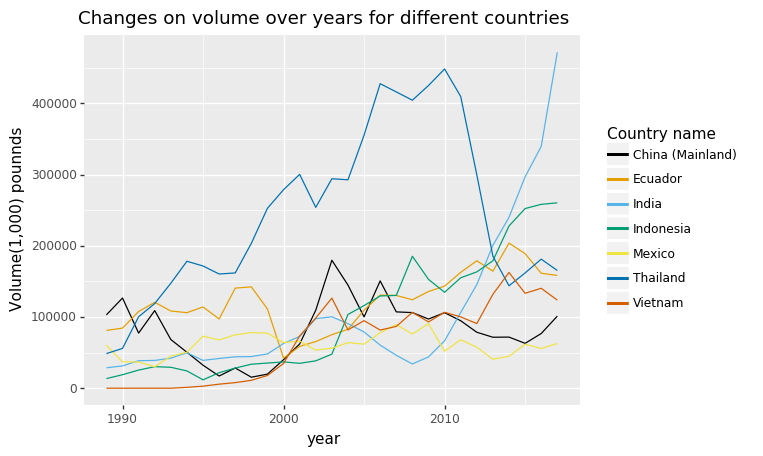

<ggplot: (7550614427)>

In [873]:
(
    ggplot(Countries, aes(x = "year", y = "Volume(1,000) pounnds", color = "Country name")) + geom_line()
    + labs(title = "Changes on volume over years for different countries")
    + scale_colour_manual(values=["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"])
)

In [874]:
#The imported volume from Thailand increases fast until 2010, and then decrease fast.
#The imported volume from India increase extremely fast around 2010 and becomes the first in 2018
#The general trend for Ecuador, Vietnam and Indonesia keeps increasing.
#The general trend for imported volume from China decrease before around 1999 and then increase after around 2000, then
#it decreases again after around 2003.
#The general trend for Mexico almost keeps the same. That is, it fluctuates slightly compared with other countries.